<a href="https://colab.research.google.com/github/YukiAoki-GU/-Mathematical_analysis_by_Python/blob/main/Python%E3%81%AB%E3%82%88%E3%82%8B%E6%95%B0%E7%90%86%E8%A7%A3%E6%9E%905%E5%9B%9E%E7%9B%AE(CNN%2C_2026_02_05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# CNN(畳み込み)とは
Convolutional Neural Network

---
# 画像の読み書き

幅が400ピクセル，高さが300ピクセルのlena.jpgをNumpyで読み込みMatplotlibで表示しましょう。

In [1]:
! wget -O lena.jpg https://i.gzn.jp/img/2009/06/18/lenna/000.jpg #lena.jpgのダウンロード

--2026-02-04 07:38:11--  https://i.gzn.jp/img/2009/06/18/lenna/000.jpg
Resolving i.gzn.jp (i.gzn.jp)... 104.21.71.146, 172.67.170.178, 2606:4700:3035::6815:4792, ...
Connecting to i.gzn.jp (i.gzn.jp)|104.21.71.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32189 (31K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>]  31.43K   198KB/s    in 0.2s    

2026-02-04 07:38:11 (198 KB/s) - ‘lena.jpg’ saved [32189/32189]



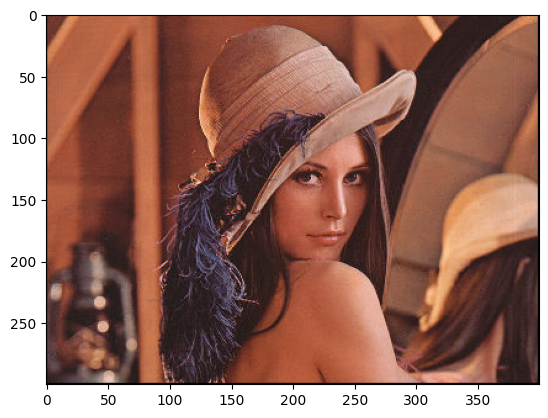

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image   # ← これを追加

image = np.array(Image.open('lena.jpg'))  #絵を配列として読み込む
plt.imshow(image)                         #表示

配列の中身がどのようになっているのかを確認しましょう。

In [7]:
print(image)

[[[  0   6   7]
  [ 21  10  14]
  [ 15   0   0]
  ...
  [  3   1   0]
  [ 35   6   2]
  [  0   9  41]]

 [[ 18   8   9]
  [ 91  49  51]
  [102  48  46]
  ...
  [216 154  95]
  [213 127  80]
  [ 16   6   0]]

 [[ 15   0   0]
  [107  54  48]
  [122  56  44]
  ...
  [222 147  79]
  [223 131  82]
  [  8   0   0]]

 ...

 [[  6   0   0]
  [ 41  33  31]
  [ 48  38  37]
  ...
  [ 88  63  58]
  [ 58  43  40]
  [  6   0   0]]

 [[ 13   9   6]
  [ 40  36  33]
  [ 44  39  36]
  ...
  [ 74  59  56]
  [ 50  42  40]
  [ 12   8   9]]

 [[  0   0   0]
  [  3   3   1]
  [  3   2   0]
  ...
  [ 11   3   1]
  [  3   1   2]
  [  0   0   2]]]


配列の形状を確認しましょう。(行数，列数，rgbの3成分)

In [8]:
print(image.shape)

(300, 400, 3)


配列のサイズを確認しましょう。

In [9]:
print(image.size)

360000


[r g b]のgを0にして，緑成分を消してみましょう。

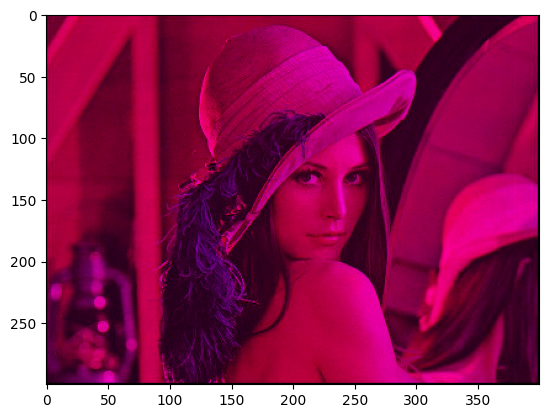

In [10]:
green = [i for i in range(1, image.size, 3)]

np.put(image, green, 0)
plt.imshow(image)

---

In [2]:
# tensorflowのインポート
import tensorflow as tf

# MNISTデータセットの読み込み
(x_trains, y_trains), (x_tests, y_tests) = tf.keras.datasets.mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_trains = x_trains.reshape(60000, 28, 28, 1)
# 訓練データをfloat32(浮動小数点数)型に変換
x_trains = x_trains.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_trains /= 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(29.0, -1.0)

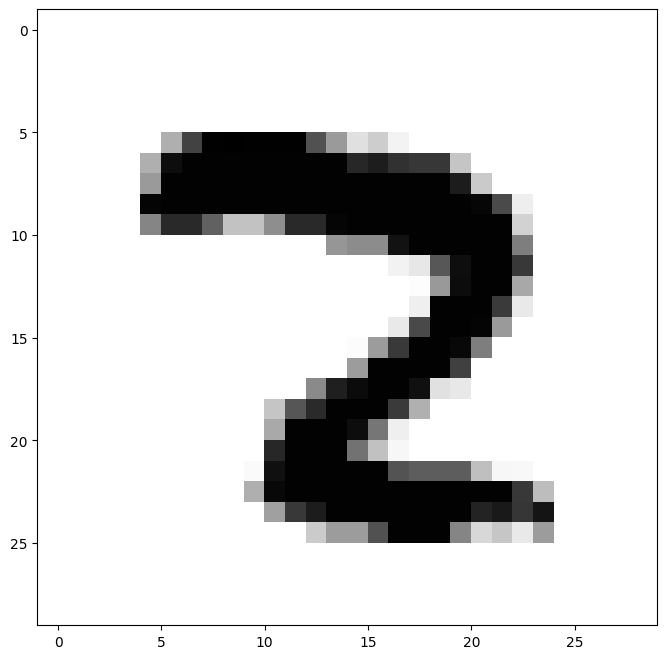

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# フィルターを適用する画像のインデックス
img_id = 28
# 画像のピクセル値を取得
img_x = x_trains[img_id, :, :, 0]

img_height = 28 # 画像の縦サイズ
img_width = 28  # 画像の横サイズ
# 画像データを28×28の行列に変換
img_x = img_x.reshape(img_height, img_width)
# プロットエリアのサイズを設定
plt.ﬁgure(ﬁgsize=(8, 8))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)
plt.gray()

# 2×2のグリッドの上段左に元の画像をプロット
plt.subplot(1, 1, 1)
# 色相を反転させてプロットする
plt.pcolor(1-img_x)
plt.xlim(-1, 29) # x軸を-1~29の範囲
plt.ylim(29, -1) # y軸を29~-1の範囲

In [13]:
import numpy as np

# フィルターの作成

# 縦方向のエッジを検出するフィルター
vertical_edge_fil = np.array([[-2, 1, 1],
                              [-2, 1, 1],
                              [-2, 1, 1]],
                             dtype=ﬂoat)
# 横方向のエッジを検出するフィルター
horizontal_edge_fil = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [-2, -2, -2]],
                               dtype=ﬂoat)

In [14]:
# フィルターを適用する画像のインデックス
img_id = 28
# 画像のピクセル値を取得
img_x = x_trains[img_id, :, :, 0]

img_height = 28 # 画像の縦サイズ
img_width = 28  # 画像の横サイズ
# 画像データを28×28の行列に変換
img_x = img_x.reshape(img_height, img_width)
#print(img_x)

# Convert the data to a 1D array
img_1d = img_x.ravel()
print(img_1d)
# 縦エッジのフィルター適用後の値を代入する行列を用意
vertical_edge = np.zeros_like(img_x)
# 横エッジのィルター適用後の値を代入する行列を用意
horizontal_edge = np.zeros_like(img_x)

# 3×3のフィルターを適用
for h in range(img_height - 3):
    for w in range(img_width - 3):
        # フィルターを適用する領域を取得
        img_region = img_x[h:h + 3, w:w + 3]
        # 縦エッジのフィルターを適用
        vertical_edge[h + 1, w + 1] = np.dot(
            # 画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            # 縦エッジのフィルターを1次元の配列に変換
            vertical_edge_fil.reshape(-1)
        )
        # 横エッジのフィルターを適用
        horizontal_edge[h + 1, w + 1] = np.dot(
            # 画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            # 横エッジのフィルターを1次元の配列に変換
            horizontal_edge_fil.reshape(-1)
        )

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

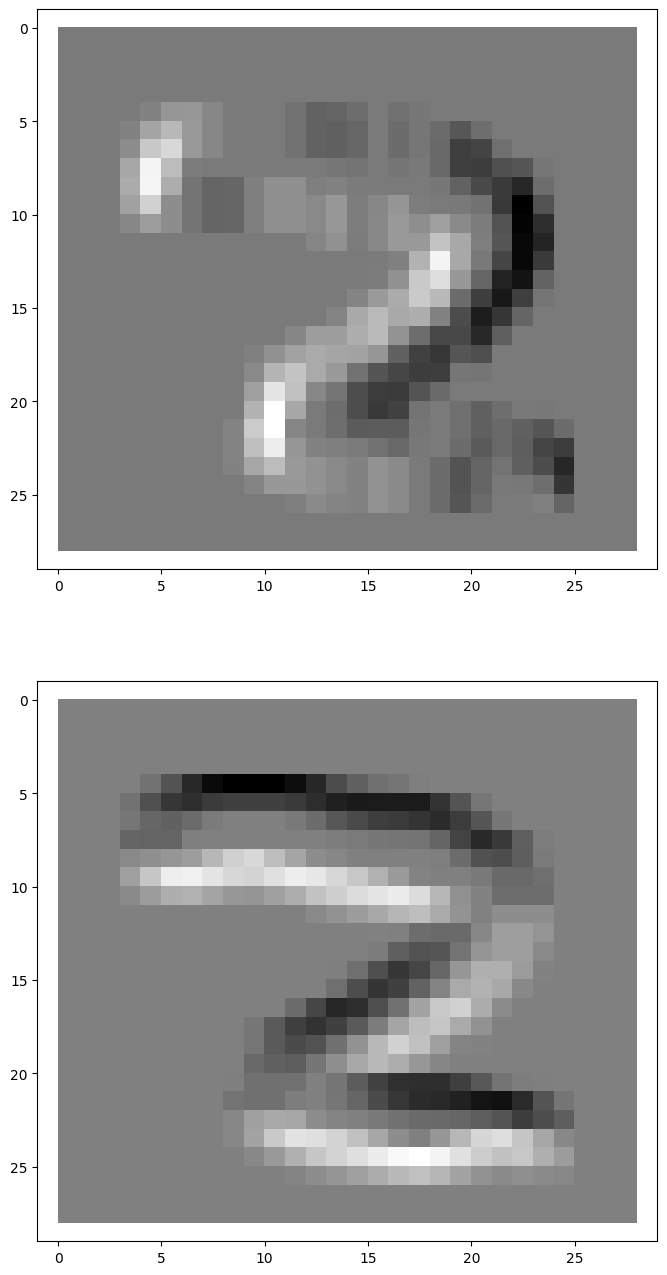

In [15]:
# フィルター適用前と適用後の画像を出力する
%matplotlib inline
import matplotlib.pyplot as plt

# プロットエリアのサイズを設定
plt.ﬁgure(ﬁgsize=(8, 16))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)
plt.gray()

# # 2×2のグリッドの上段左に元の画像をプロット
# plt.subplot(2, 2, 1)
# # 色相を反転させてプロットする
# plt.pcolor(1-img_x)
# plt.xlim(-1, 29) # x軸を-1~29の範囲
# plt.ylim(29, -1) # y軸を29~-1の範囲

# 2×2のグリッドの下段左に縦エッジ適用後をプロット
plt.subplot(2, 1, 1)
# 色相を反転させてプロットする
plt.pcolor(vertical_edge)
plt.xlim(-1, 29)
plt.ylim(29, -1)

# 2×2のグリッドの下段右に横エッジ適用後をプロット
plt.subplot(2, 1, 2)
# 色相を反転させてプロットする
plt.pcolor(horizontal_edge)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

---
# 1-3. 人工ニューロンを作ってみよう(Teachable Machine)
以下のような，`グー`と`チョキ`を区別する人工ニューロンを作ってみましょう。

人工ニューロンへの入力として`グー`または`チョキ`の画像が与えられ，判定結果が出力されるものとします。
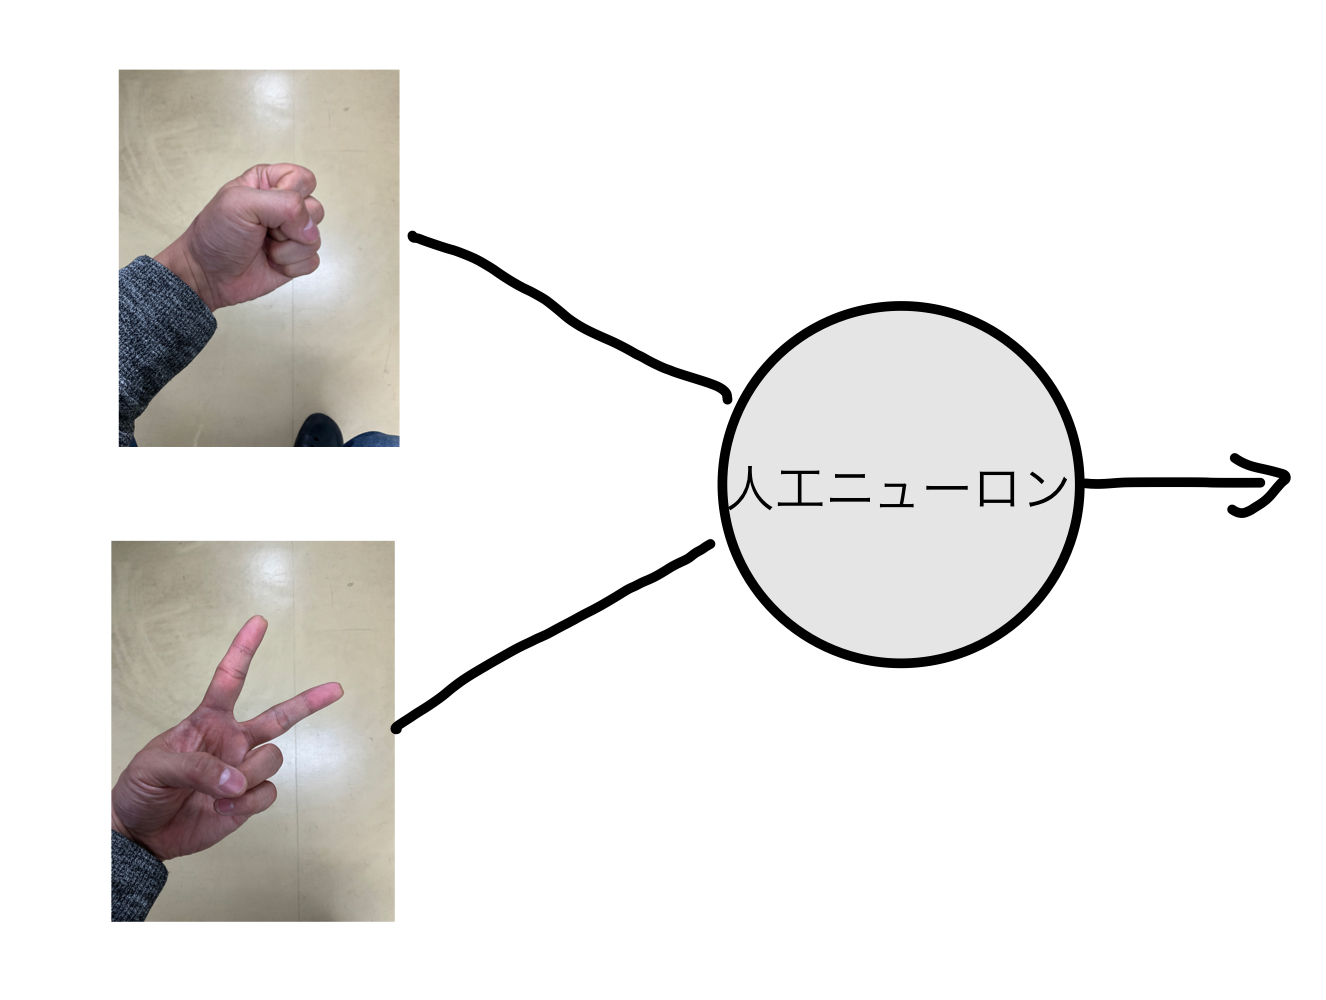


何はともあれ，グーとチョキを区別する人工ニューロンを作ってみよう！

Googleの[Teachable Machine](https://teachablemachine.withgoogle.com/train)を使いましょう。

* 「画像プロジェクト」→「標準の画像モデル」に進みます。

* 「Class 1」を「グー」，「Class 2」を「チョキ」に名前を変えます(下図参照)。
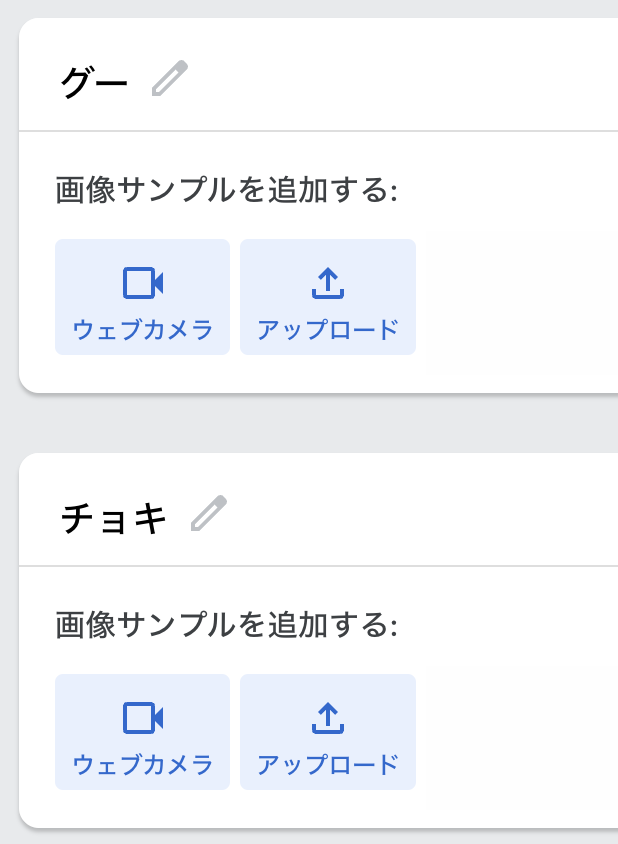

* 「ウェブカメラ」をクリックして「グー」と「チョキ」の写真をそれぞれ200枚程度づつ撮影します(下図参照)。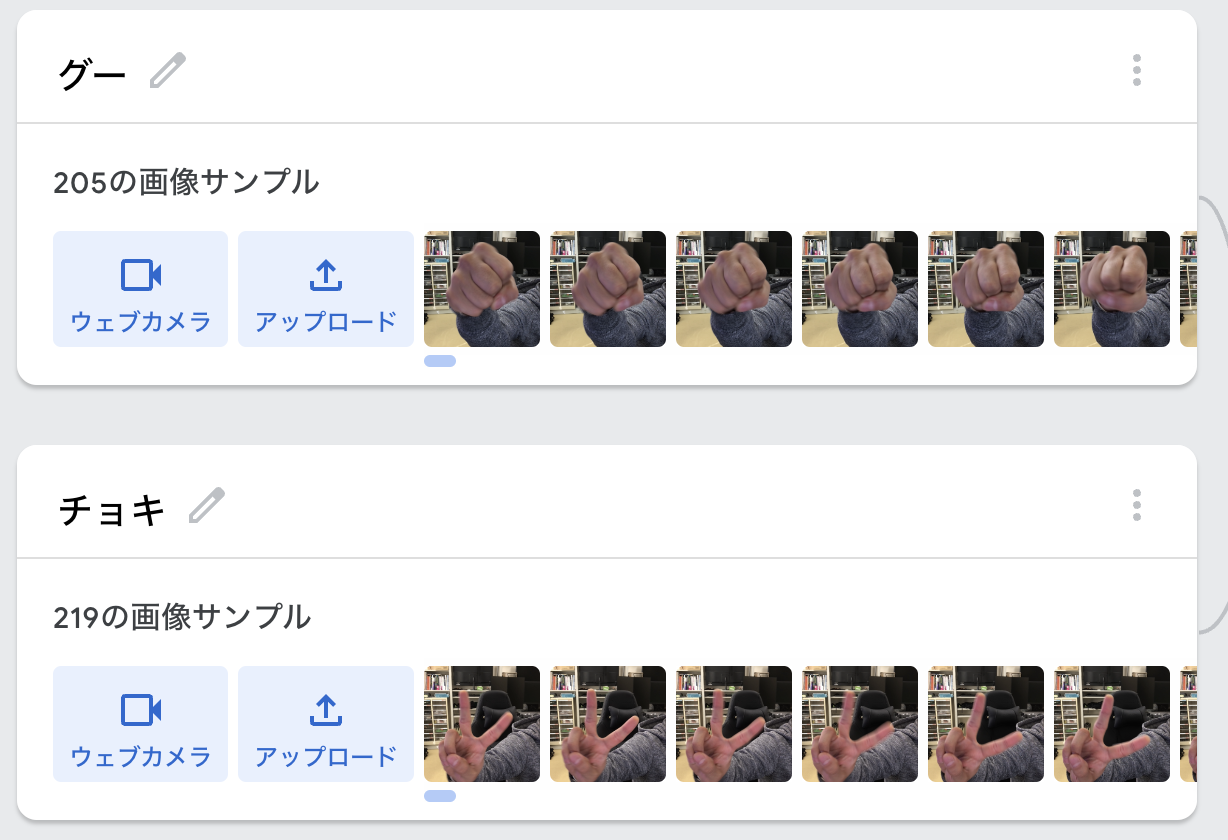

* 「モデルをトレーニングする」をクリックしてしばらく待つ
* 「グー」「チョキ」が正しく認識されることを確認(下の図はチョキの時の判定結果が100%の場合)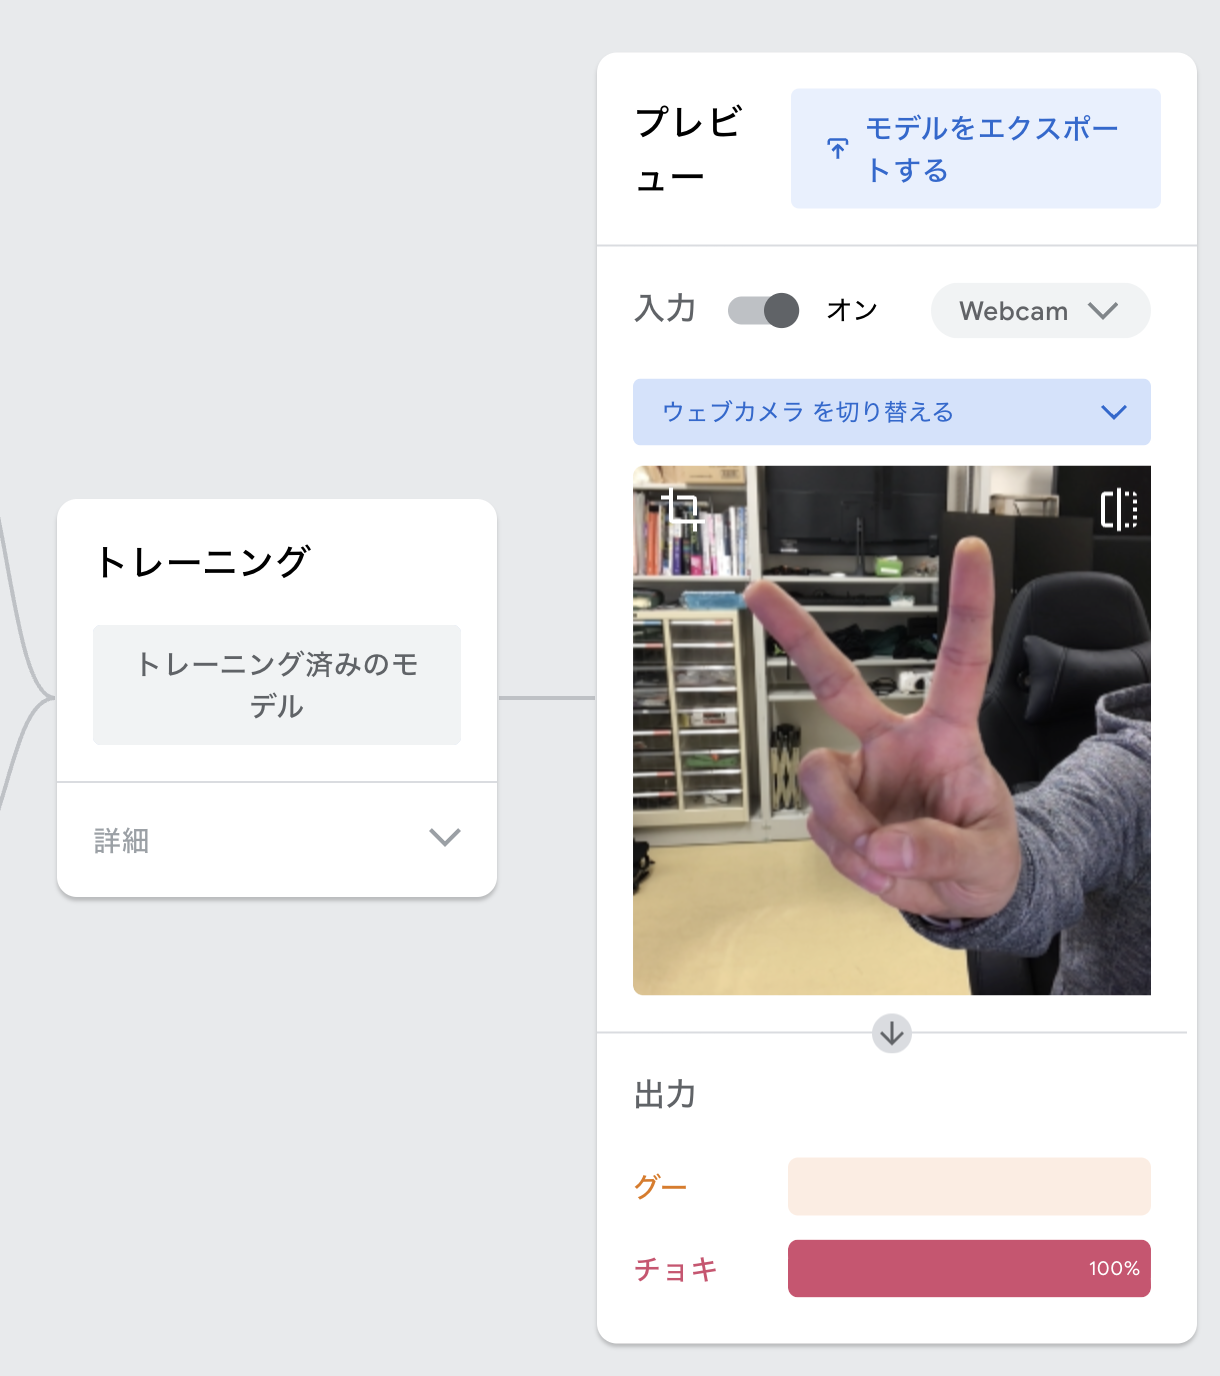

---
# 1-4. 作った人工ニューロンの解説
Teachable Machineというアプリが作った人工ニューロンがどのようなものかを大雑把に説明します。

撮影した合計400枚程度の画像を「グー」と「チョキ」に正しく分類するための訓練を50回行なっています。このトレーニング回数を「エポック数」と呼びます。

作った人工ニューロンをダウンロードし，その中身を見てみましょう。

* 「モデルをエクスポートする」をクリック
* 「Tensorflow」をクリックし「モデルをダウンロード」をクリック(下図参照)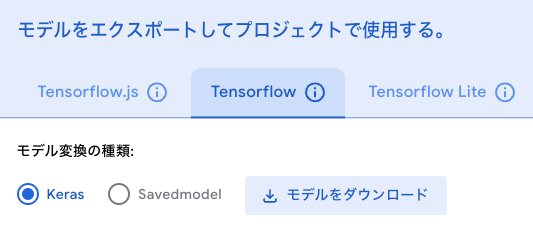

* 「converted_keras.zip」というzipファイルができるので解凍する
* 回答されたフォルダ(converted_keras)の中に，「keras_model.h5」「labels.txt」の2つのファイルがあることを確認(下図参照)

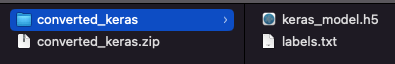

* 「labels.txt」の中身は「グー」を0，「チョキ」を1とラベリングした結果が入っているだけ。
* 「keras_model.h5」が作った人工ニューロンのモデル

「keras_model.h5」の中身を見ることで人工ニューロンの中身を見ることができるが，「[NETRON](https://netron.app/)」という専用のソフトを使ってみてみましょう。

* NETRONの画面で「Open Model」をクリック(下図参照)
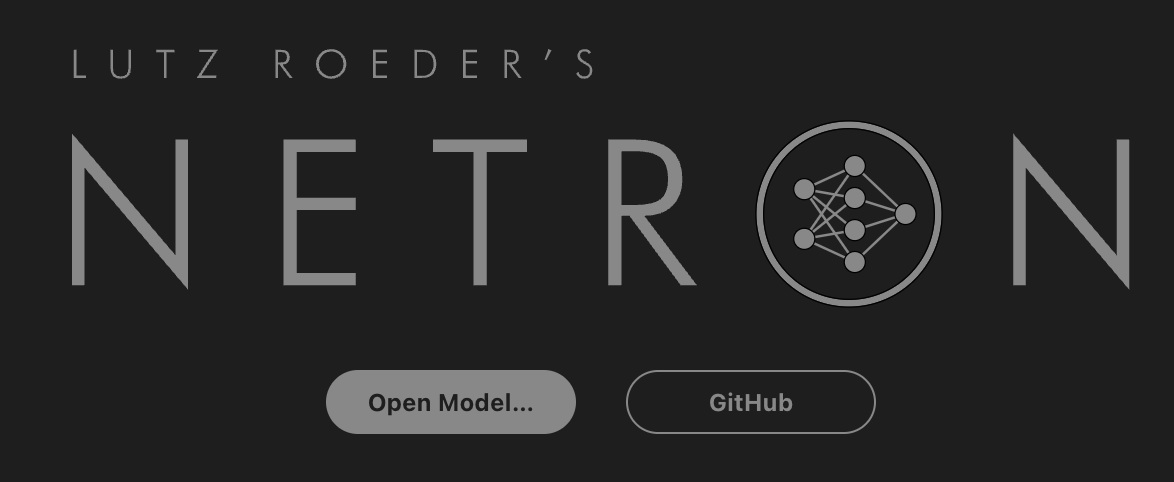

* ダウンロードした「keras_model.h5」を開く(下図参照)

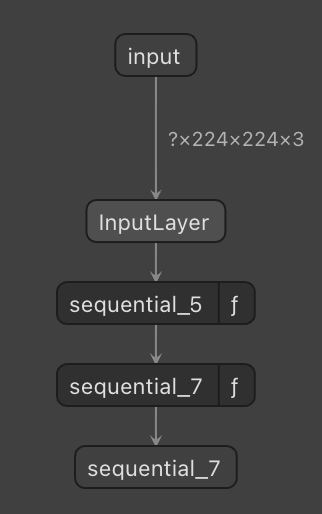

それぞれのノードをクリックすることで，何をしているかを見ることができます。やっていることはConvolutional Neural Network(CNN)という処理ですが，画像処理の説明になってしまうので，この授業でCNNの詳細は扱いません。

---
# 1-5. 人工ニューロンのPythonへの実装
何はともあれ，作った人工ニューロンをPythonに実装してみましょう。

Teachable Machineで撮影した写真を一枚選んで，「グー」であるのか，「チョキ」であるのかを判定します。

* 下の図のようにTeachable Machineで撮影した写真を一枚選んで右クリックでダウンロード。ファイル名はdownload.pngとしておくこと
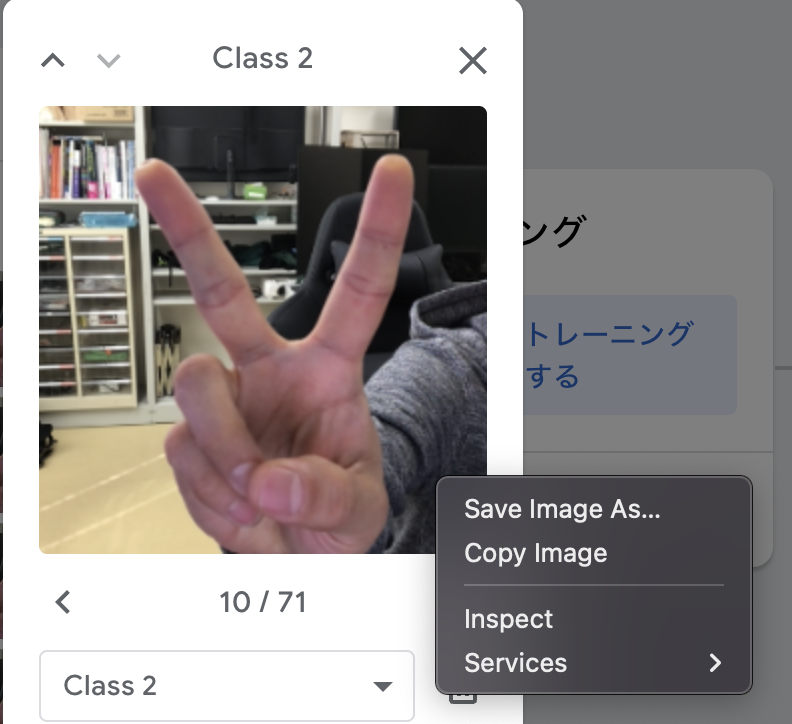

「keras_model.h5」「labels.txt」「download.png」の3つのファイルをColabにアップロード(下図参照)
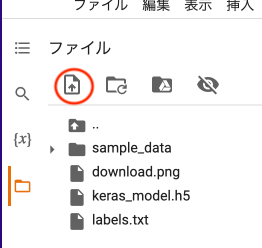

以下がPythonのコードです。
とりあえず動かしてみて，正しく判定されることを確認しましょう。

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps #Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# アップロードしたモデルのファイル名を入力しましょう。
model = load_model('keras_model.h5', compile=False)

# アップロードしたラベルのファイル名を入力しましょう。
class_names = open('labels.txt', 'r').readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# アップロードした「グー」あるいは「チョキ」のファイル名を入力しましょう。
image = Image.open('download.png').convert('RGB')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
#image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image = ImageOps.fit(image, size, Image.LANCZOS)
#turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

print('Class:', class_name, end='')
print('Confidence score:', confidence_score)


1/1 [==============================] - 1s 1s/step
Class: 1 チョキ
Confidence score: 0.9999963
